<a href="https://colab.research.google.com/github/toruuno/DNN_d1d2/blob/master/2_5_overfiting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Googleドライブのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/lesson_2')
sys.path.append('/content/drive/My Drive/common')
sys.path.append('/content/drive/My Drive')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.20666666666666667
                : 10. 正答率(テスト) = 0.1567
Generation: 20. 正答率(トレーニング) = 0.2966666666666667
                : 20. 正答率(テスト) = 0.2203
Generation: 30. 正答率(トレーニング) = 0.3566666666666667
                : 30. 正答率(テスト) = 0.2723
Generation: 40. 正答率(トレーニング) = 0.4033333333333333
                : 40. 正答率(テスト) = 0.2998
Generation: 50. 正答率(トレーニング) = 0.45
                : 50. 正答率(テスト) = 0.3258
Generation: 60. 正答率(トレーニング) = 0.54
                : 60. 正答率(テスト) = 0.3899
Generation: 70. 正答率(トレーニング) = 0.5933333333333334
                : 70. 正答率(テスト) = 0.4317
Generation: 80. 正答率(トレーニング) = 0.6533333333333333
                : 80. 正答率(テスト) = 0.4756
Generation: 90. 正答率(トレーニング) = 0.7333333333333333
                : 90. 正答率(テスト) = 0.5304
Generation: 100. 正答率(トレーニング) = 0.75
                : 100. 正答率(テスト) = 0.5442
Generation: 110. 正答率(トレーニング) = 0.78
                : 110. 正答率(テスト) = 0.5888
Generation: 120. 正答率(トレーニング) = 0.8133333333333334
            

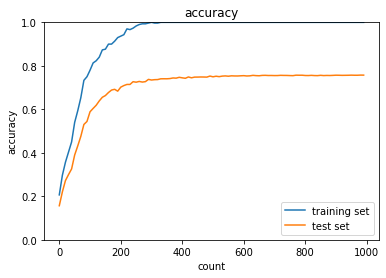

In [ ]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12666666666666668
                : 10. 正答率(テスト) = 0.1079
Generation: 20. 正答率(トレーニング) = 0.20666666666666667
                : 20. 正答率(テスト) = 0.1541
Generation: 30. 正答率(トレーニング) = 0.28
                : 30. 正答率(テスト) = 0.2062
Generation: 40. 正答率(トレーニング) = 0.33
                : 40. 正答率(テスト) = 0.2376
Generation: 50. 正答率(トレーニング) = 0.36
                : 50. 正答率(テスト) = 0.256
Generation: 60. 正答率(トレーニング) = 0.36666666666666664
                : 60. 正答率(テスト) = 0.2584
Generation: 70. 正答率(トレーニング) = 0.38666666666666666
                : 70. 正答率(テスト) = 0.2687
Generation: 80. 正答率(トレーニング) = 0.4
                : 80. 正答率(テスト) = 0.2846
Generation: 90. 正答率(トレーニング) = 0.38666666666666666
                : 90. 正答率(テスト) = 0.2925
Generation: 100. 正答率(トレーニング) = 0.45666666666666667
                : 100. 正答率(テスト) = 0.3258
Generation: 110. 正答率(トレーニング) = 0.48333333333333334
                : 110. 正答率(テスト) = 0.3465
Generation: 120. 正答率(トレーニング) = 0.51
                : 120.

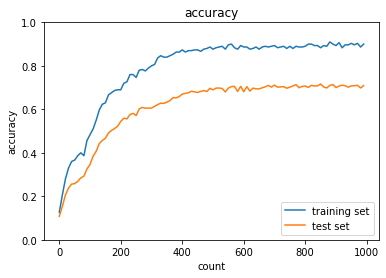

In [ ]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.4666666666666667
                : 10. 正答率(テスト) = 0.3225
Generation: 20. 正答率(トレーニング) = 0.52
                : 20. 正答率(テスト) = 0.3605
Generation: 30. 正答率(トレーニング) = 0.6266666666666667
                : 30. 正答率(テスト) = 0.4687
Generation: 40. 正答率(トレーニング) = 0.5133333333333333
                : 40. 正答率(テスト) = 0.4417
Generation: 50. 正答率(トレーニング) = 0.7533333333333333
                : 50. 正答率(テスト) = 0.5561
Generation: 60. 正答率(トレーニング) = 0.7666666666666667
                : 60. 正答率(テスト) = 0.5486
Generation: 70. 正答率(トレーニング) = 0.94
                : 70. 正答率(テスト) = 0.7336
Generation: 80. 正答率(トレーニング) = 0.84
                : 80. 正答率(テスト) = 0.6542
Generation: 90. 正答率(トレーニング) = 0.7866666666666666
                : 90. 正答率(テスト) = 0.5791
Generation: 100. 正答率(トレーニング) = 0.7866666666666666
                : 100. 正答率(テスト) = 0.6035
Generation: 110. 正答率(トレーニング) = 0.9
                : 110. 正答率(テスト) = 0.6757
Generation: 120. 正答率(トレーニング) = 0.8833333333333333
              

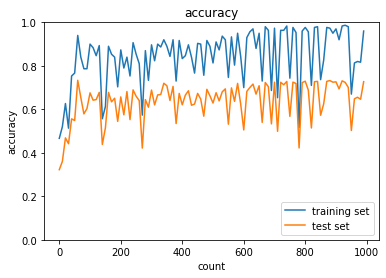

In [ ]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

--------------------------------
weight_decay_lambda:0.001


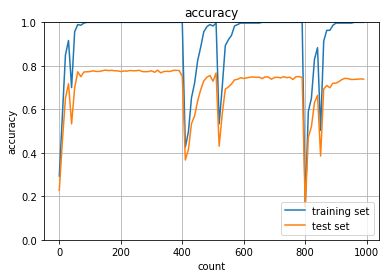

--------------------------------
weight_decay_lambda:0.005


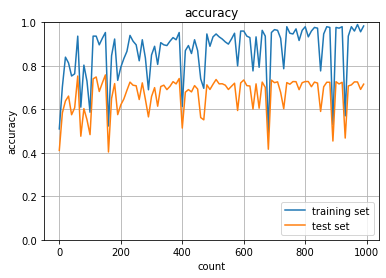

--------------------------------
weight_decay_lambda:0.01


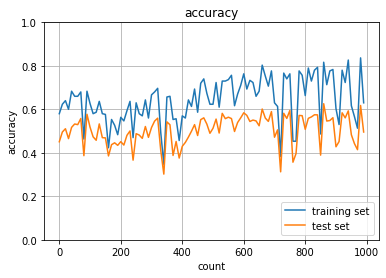

--------------------------------
weight_decay_lambda:0.02


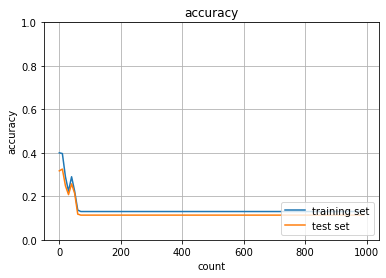

--------------------------------
weight_decay_lambda:0.03


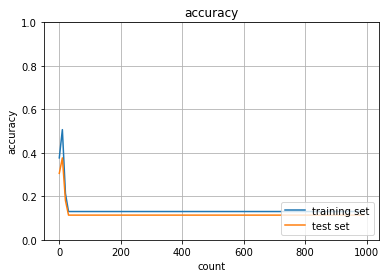

In [ ]:
#まずは関数化

def try_func1(weight_decay_lambda = 0.005,debug=True):
    (x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)
    print("--------------------------------")
    print("weight_decay_lambda:{}".format(weight_decay_lambda))
    if debug: print("データ読み込み完了")

    # 過学習を再現するために、学習データを削減
    x_train = x_train[:300]
    d_train = d_train[:300]

    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


    iters_num = 1000
    train_size = x_train.shape[0]
    batch_size = 100
    learning_rate=0.1

    train_loss_list = []
    accuracies_train = []
    accuracies_test = []

    plot_interval=10
    hidden_layer_num = network.hidden_layer_num

    # 正則化強度設定 ======================================
    #weight_decay_lambda = 0.005
    # =================================================

    for i in range(iters_num):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        d_batch = d_train[batch_mask]

        grad = network.gradient(x_batch, d_batch)
        weight_decay = 0
        
        for idx in range(1, hidden_layer_num+1):
            grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
            grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
            network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
            network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
            weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

        loss = network.loss(x_batch, d_batch) + weight_decay
        train_loss_list.append(loss)        
            
        if (i+1) % plot_interval == 0:
            accr_train = network.accuracy(x_train, d_train)
            accr_test = network.accuracy(x_test, d_test)
            accuracies_train.append(accr_train)
            accuracies_test.append(accr_test)
            
            if debug: print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            if debug: print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                    
    lists = range(0, iters_num, plot_interval)
    plt.plot(lists, accuracies_train, label="training set")
    plt.plot(lists, accuracies_test,  label="test set")
    plt.legend(loc="lower right")
    plt.title("accuracy")
    plt.xlabel("count")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.grid()

    # グラフの表示
    plt.show()


#weight_decay_lambdaを弄って比較する
try_func1(weight_decay_lambda=0.001,debug=False)
try_func1(weight_decay_lambda=0.005,debug=False)
try_func1(weight_decay_lambda=0.01,debug=False)
try_func1(weight_decay_lambda=0.02,debug=False)
try_func1(weight_decay_lambda=0.03,debug=False)

#weight_decay_lambdaをデフォルト値より少しいじるが
#過学習気味なのは改善せず(大きくすればそれなりに寄る方向だけど精度が激烈に下がる)

## Dropout

In [ ]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.10333333333333333
                : 10. 正答率(テスト) = 0.1276
Generation: 20. 正答率(トレーニング) = 0.12666666666666668
                : 20. 正答率(テスト) = 0.1345
Generation: 30. 正答率(トレーニング) = 0.14333333333333334
                : 30. 正答率(テスト) = 0.1431
Generation: 40. 正答率(トレーニング) = 0.16
                : 40. 正答率(テスト) = 0.1504
Generation: 50. 正答率(トレーニング) = 0.17333333333333334
                : 50. 正答率(テスト) = 0.1622
Generation: 60. 正答率(トレーニング) = 0.19666666666666666
                : 60. 正答率(テスト) = 0.1714
Generation: 70. 正答率(トレーニング) = 0.19
                : 70. 正答率(テスト) = 0.1819
Generation: 80. 正答率(トレーニング) = 0.22
                : 80. 正答率(テスト) = 0.198
Generation: 90. 正答率(トレーニング) = 0.25666666666666665
                : 90. 正答率(テスト) = 0.2136
Generation: 100. 正答率(トレーニング) = 0.28
                : 100. 正答率(テスト) = 0.2278
Generation: 110. 正答率(トレーニング) = 0.31666666666666665
                : 110. 正答率(テスト) = 0.2426
Generation: 120. 正答率(トレーニング) = 0.31333333333333335
      

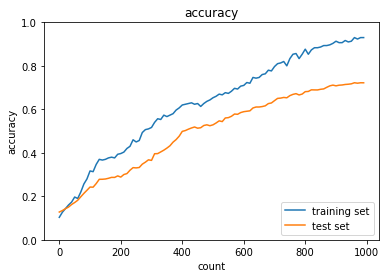

In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer_ = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer_.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
from common import optimizer
#パラメータ弄るため関数化
from enum import Enum
class OPTTYPE(Enum):
    SDG= 1
    MOMENTUM = 2
    ADAGRAD = 3
    ADAM = 4
    UNKNOWN = 100
  

def set_optimizer(opttype):
    if opttype == OPTTYPE.SDG:
        return optimizer.SGD(learning_rate=0.01)
    if opttype == OPTTYPE.MOMENTUM:
        return optimizer.Momentum(learning_rate=0.01, momentum=0.9)
    elif opttype == OPTTYPE.ADAGRAD:
        return optimizer.AdaGrad(learning_rate=0.01)
    elif opttype == OPTTYPE.ADAM:
        return optimizer.Adam()
    return None


def try_func2(dropout_ratio=0.15, opttype=OPTTYPE.SDG, debug=True):
    (x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

    print('--------------------------------------')
    print('dropout_ratio:{} optimizer:{}'.format(dropout_ratio,opttype.name))
    if debug: print("データ読み込み完了")

    # 過学習を再現するために、学習データを削減
    x_train = x_train[:300]
    d_train = d_train[:300]

    # ドロップアウト設定 ======================================
    use_dropout = True
    #dropout_ratio = 0.15
    # ====================================================

    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                            weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)

    optimizer_ = set_optimizer(opttype)

    iters_num = 1000
    train_size = x_train.shape[0]
    batch_size = 100

    train_loss_list = []
    accuracies_train = []
    accuracies_test = []

    plot_interval=10


    for i in range(iters_num):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        d_batch = d_train[batch_mask]

        grad = network.gradient(x_batch, d_batch)
        optimizer_.update(network.params, grad)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)    
        
        if (i+1) % plot_interval == 0:
            accr_train = network.accuracy(x_train, d_train)
            accr_test = network.accuracy(x_test, d_test)
            accuracies_train.append(accr_train)
            accuracies_test.append(accr_test)

            if debug: print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            if debug: print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
            
    lists = range(0, iters_num, plot_interval)
    plt.plot(lists, accuracies_train, label="training set")
    plt.plot(lists, accuracies_test,  label="test set")
    plt.legend(loc="lower right")
    plt.title("accuracy")
    plt.xlabel("count")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.grid()
    # グラフの表示
    plt.show()


--------------------------------------
dropout_ratio:0.1 optimizer:SDG


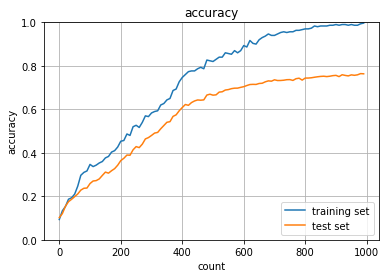

--------------------------------------
dropout_ratio:0.15 optimizer:SDG


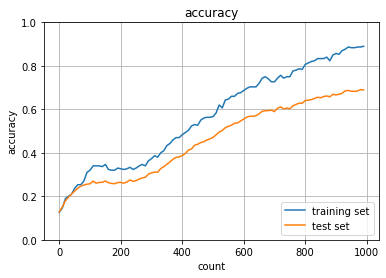

--------------------------------------
dropout_ratio:0.2 optimizer:SDG


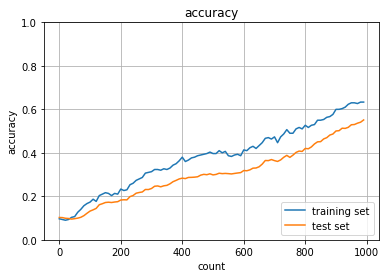

In [ ]:
#dropout_ratioとoptimizerを変更
try_func2(dropout_ratio=0.1, opttype=OPTTYPE.SDG, debug=False)
try_func2(dropout_ratio=0.15, opttype=OPTTYPE.SDG, debug=False)
try_func2(dropout_ratio=0.2, opttype=OPTTYPE.SDG, debug=False)

--------------------------------------
dropout_ratio:0.2 optimizer:MOMENTUM


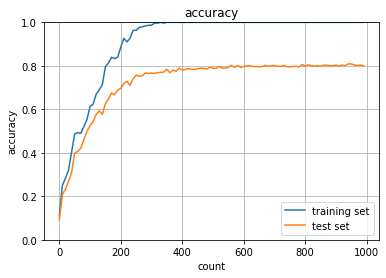

--------------------------------------
dropout_ratio:0.3 optimizer:MOMENTUM


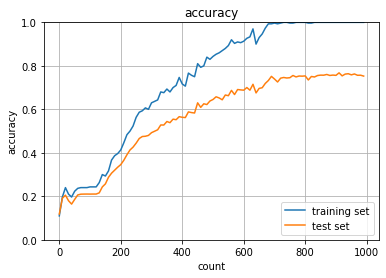

--------------------------------------
dropout_ratio:0.4 optimizer:MOMENTUM


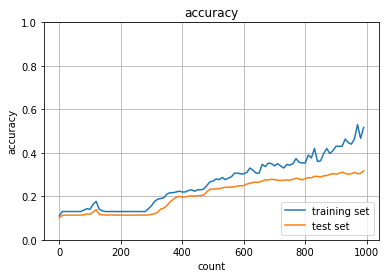

In [ ]:
#dropout_ratioとoptimizerを変更
try_func2(dropout_ratio=0.2, opttype=OPTTYPE.MOMENTUM, debug=False)
try_func2(dropout_ratio=0.3, opttype=OPTTYPE.MOMENTUM, debug=False)
try_func2(dropout_ratio=0.4, opttype=OPTTYPE.MOMENTUM, debug=False)

--------------------------------------
dropout_ratio:0.3 optimizer:ADAGRAD


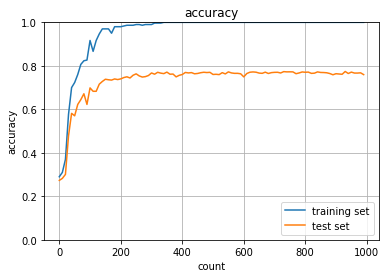

--------------------------------------
dropout_ratio:0.4 optimizer:ADAGRAD


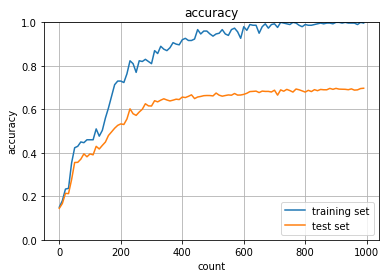

--------------------------------------
dropout_ratio:0.5 optimizer:ADAGRAD


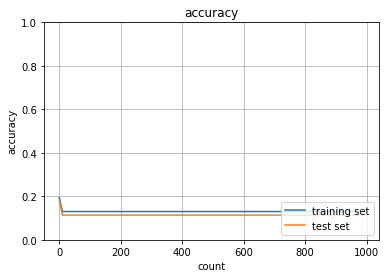

In [ ]:

#dropout_ratioとoptimizerを変更
try_func2(dropout_ratio=0.3, opttype=OPTTYPE.ADAGRAD, debug=False)
try_func2(dropout_ratio=0.4, opttype=OPTTYPE.ADAGRAD, debug=False)
try_func2(dropout_ratio=0.5, opttype=OPTTYPE.ADAGRAD, debug=False)

--------------------------------------
dropout_ratio:0.3 optimizer:ADAM


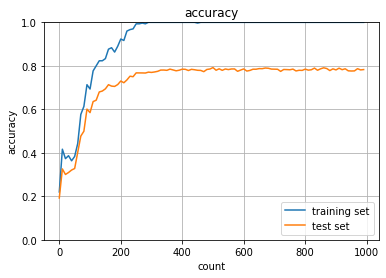

--------------------------------------
dropout_ratio:0.4 optimizer:ADAM


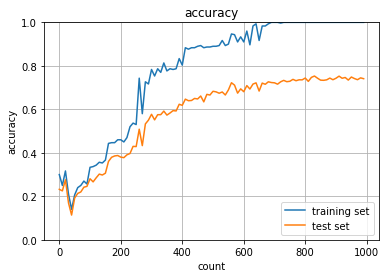

--------------------------------------
dropout_ratio:0.5 optimizer:ADAM


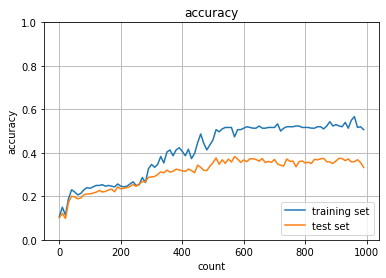

In [ ]:
#dropout_ratioとoptimizerを変更
try_func2(dropout_ratio=0.3, opttype=OPTTYPE.ADAM, debug=False)
try_func2(dropout_ratio=0.4, opttype=OPTTYPE.ADAM, debug=False)
try_func2(dropout_ratio=0.5, opttype=OPTTYPE.ADAM, debug=False)

## 過学習が解消しているとは言えないけどドロップアウトを大きくしても何とか学習しようとしているのはAdaGradやAdamと見えなくもない(一応理屈的には合っているように見える)

## 過学習対策は別途必要(というか、データ削減云々なので単純にデータが足りないだけでしょう)

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11333333333333333
                : 10. 正答率(テスト) = 0.102
Generation: 20. 正答率(トレーニング) = 0.16333333333333333
                : 20. 正答率(テスト) = 0.1323
Generation: 30. 正答率(トレーニング) = 0.20333333333333334
                : 30. 正答率(テスト) = 0.1531
Generation: 40. 正答率(トレーニング) = 0.22333333333333333
                : 40. 正答率(テスト) = 0.1684
Generation: 50. 正答率(トレーニング) = 0.22333333333333333
                : 50. 正答率(テスト) = 0.1813
Generation: 60. 正答率(トレーニング) = 0.23
                : 60. 正答率(テスト) = 0.1924
Generation: 70. 正答率(トレーニング) = 0.23
                : 70. 正答率(テスト) = 0.1955
Generation: 80. 正答率(トレーニング) = 0.25
                : 80. 正答率(テスト) = 0.2015
Generation: 90. 正答率(トレーニング) = 0.25666666666666665
                : 90. 正答率(テスト) = 0.2037
Generation: 100. 正答率(トレーニング) = 0.29
                : 100. 正答率(テスト) = 0.2148
Generation: 110. 正答率(トレーニング) = 0.2866666666666667
                : 110. 正答率(テスト) = 0.2211
Generation: 120. 正答率(トレーニング) = 0.28
                : 120.

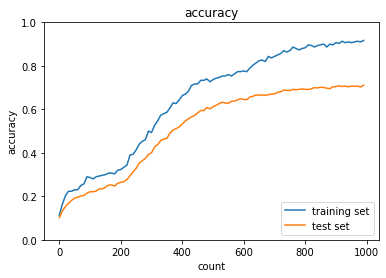

In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()